<a href="https://colab.research.google.com/github/jperdomos/Procesamiento-digital-de-se-ales/blob/main/ConvolucionChirp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Procesamiento digital de señales - **Juan Camilo Perdomo Soto**


In [1]:
!pip install numpy matplotlib scipy

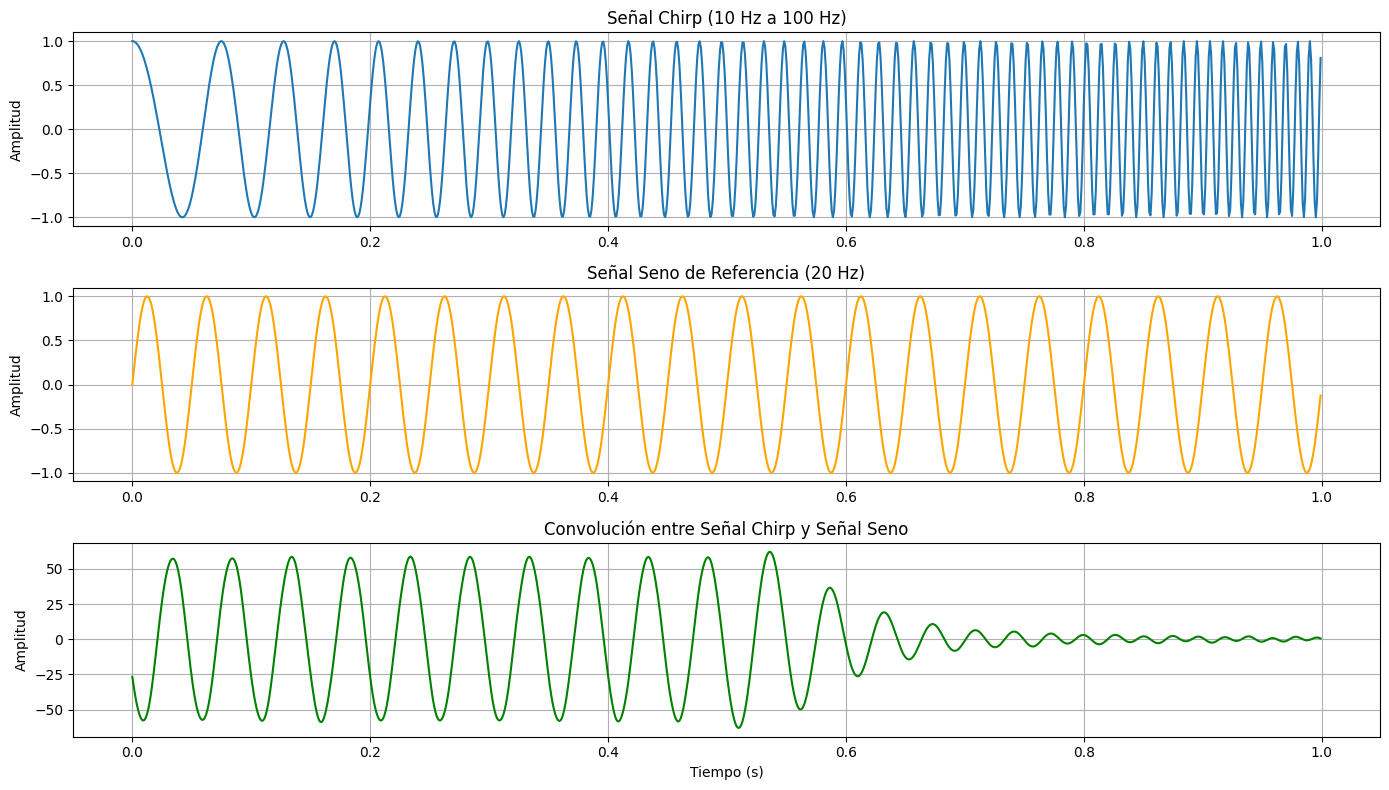

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import chirp, convolve
from scipy.fft import fft, fftfreq

# Parámetros de la señal
fs = 1000  # Frecuencia de muestreo
t = np.linspace(0, 1, fs, endpoint=False)  # Vector de tiempo

# Señal chirp de 10 a 100 Hz
chirp_signal = chirp(t, f0=10, f1=100, t1=1, method='linear')

# Señal seno de referencia a 20 Hz
ref_freq = 20  # Hz
ref_signal = np.sin(2 * np.pi * ref_freq * t)

conv_signal = convolve(chirp_signal, ref_signal, mode='same')


plt.figure(figsize=(14, 8))

# Señal chirp
plt.subplot(3, 1, 1)
plt.plot(t, chirp_signal)
plt.title("Señal Chirp (10 Hz a 100 Hz)")
plt.ylabel("Amplitud")
plt.grid(True)

# Señal de referencia
plt.subplot(3, 1, 2)
plt.plot(t, ref_signal, color='orange')
plt.title("Señal Seno de Referencia (20 Hz)")
plt.ylabel("Amplitud")
plt.grid(True)

# Resultado de la convolución
plt.subplot(3, 1, 3)
plt.plot(t, conv_signal, color='green')
plt.title("Convolución entre Señal Chirp y Señal Seno")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)

plt.tight_layout()
plt.show()


In [5]:

def compute_fft(signal, fs):
    N = len(signal)
    freq = fftfreq(N, 1/fs)
    spectrum = np.abs(fft(signal)) / N
    return freq[:N//2], spectrum[:N//2]  # Parte positiva

freq_chirp, spec_chirp = compute_fft(chirp_signal, fs)
freq_ref, spec_ref = compute_fft(ref_signal, fs)
freq_conv, spec_conv = compute_fft(conv_signal, fs)

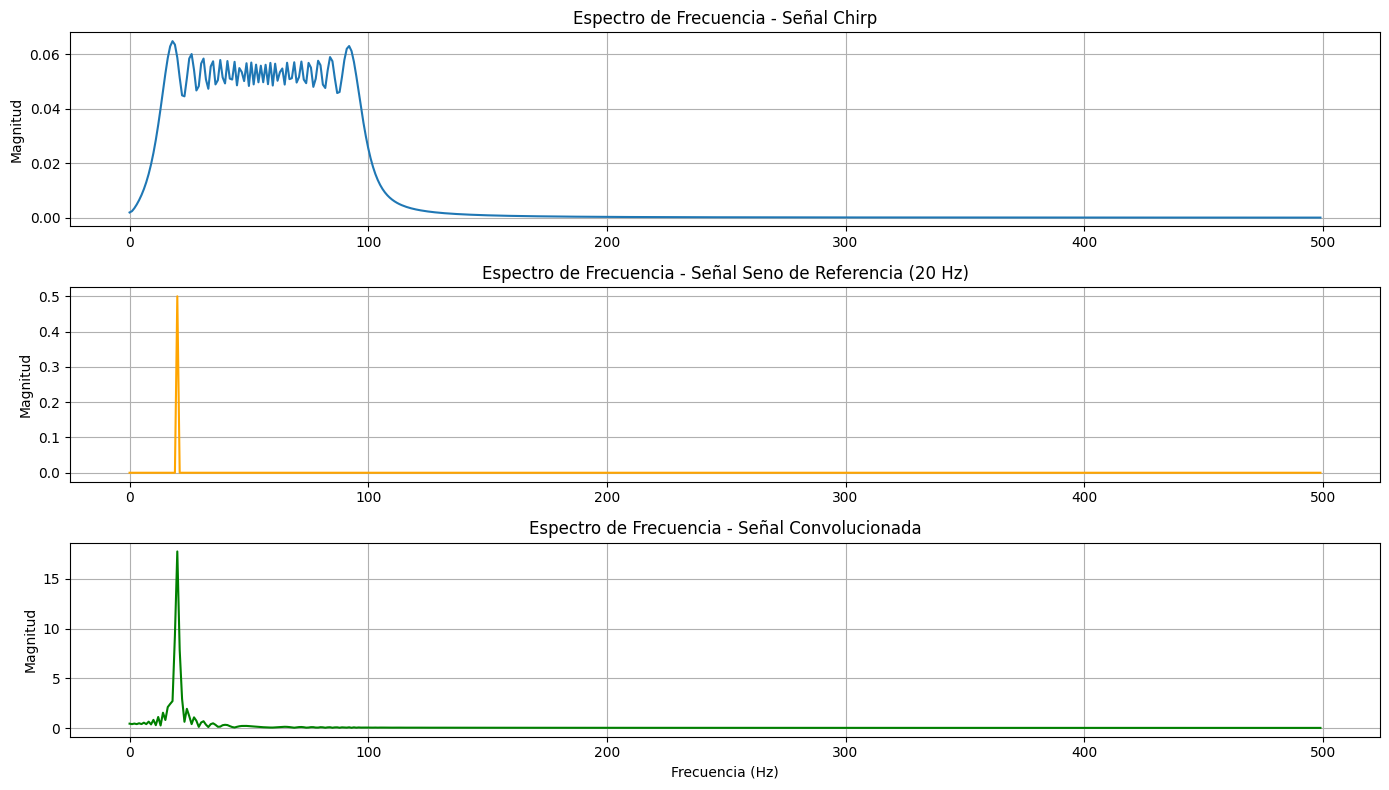

In [6]:
### ESPECTROS
plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
plt.plot(freq_chirp, spec_chirp)
plt.title("Espectro de Frecuencia - Señal Chirp")
plt.ylabel("Magnitud")
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(freq_ref, spec_ref, color='orange')
plt.title("Espectro de Frecuencia - Señal Seno de Referencia (20 Hz)")
plt.ylabel("Magnitud")
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(freq_conv, spec_conv, color='green')
plt.title("Espectro de Frecuencia - Señal Convolucionada")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.grid(True)

plt.tight_layout()
plt.show()